In [2]:
import pandas as pd
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [3]:
def parse_line(r):
    
    r[0] = r[0].split('/')[-1].split('.')[0]
    res = dict(zip(['fasta','rsmd', 'fa1','fa2','seconds'],r))
    res['rsmd'] = float(res['rsmd'])
    res['fa1'] = float(res['fa1'])
    res['fa2'] = float(res['fa2'])
    return res

def read_file(result_dir, filename):
    with open(os.path.join(result_dir ,filename),'r') as f:
            f.readline()
            f.readline()
            r = f.readline()
            r = r.split(',')
    res = parse_line(r)
    
    try:
        res['seconds'] = float(res['seconds'])
    except:
        pass

    return res

In [18]:
# perfect alphas
di = 'out_trajectories_perf'
directory = os.fsencode(di)
results = []

for file in os.listdir(directory):
    filename = os.fsdecode(file)
    res_type = ''
    if '.args' in filename:
        if 'original' in filename:
            # unchanged distogram
            res_type = 'original'
        elif 'False' in filename:
            # merged distogram 
            res_type = 'merged'
        elif 'True' in filename:
            # filtered distogram
            res_type = 'merged_filtered'
        else:
            continue
        res = read_file(di, filename)
        res['experiment'] = res_type
        results.append(res)


In [19]:
df = pd.DataFrame(results)
g = df.groupby(['experiment','fasta']).mean()

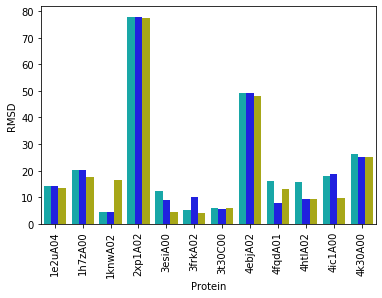

In [20]:
#sns.set(rc={'figure.figsize':(7,5)})
from cycler import cycler
import matplotlib as mpl
mpl.rcParams['axes.prop_cycle'] = cycler(color=['c', 'b', 'y', 'k'])
by_school = sns.barplot(x='fasta',y='rsmd',hue='experiment',data=g.reset_index())
for item in by_school.get_xticklabels():
    item.set_rotation(90)
by_school.set_xlabel('Protein')
by_school.set_ylabel('RMSD')
by_school.get_legend().remove()

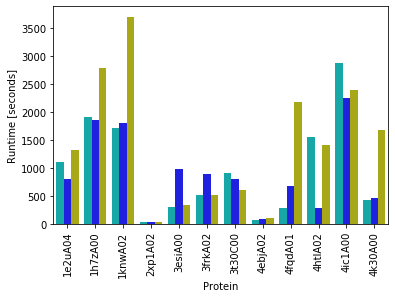

In [21]:
by_school = sns.barplot(x='fasta',y='seconds',hue='experiment',data=g.reset_index())
for item in by_school.get_xticklabels():
    item.set_rotation(90)
by_school.set_xlabel('Protein')
by_school.set_ylabel('Runtime [seconds]')
by_school.get_legend().remove()

In [22]:
### weighted computation failed so...[True, False, Original]
# we did not log the runtime LOL

In [23]:
res1 = """fasta/3frkA02.fasta 3.742220640182495 131637.86024983853 926.3798775202994
fasta/3frkA02.fasta 10.868977546691895 135636.48479933507 1890.997837856624
fasta/3frkA02.fasta 4.537967681884766 129030.5401579888 831.513114787295
fasta/1h7zA00.fasta 15.734100341796875 340474.20983812015 1429.4570824436241
fasta/1h7zA00.fasta 19.46101188659668 335670.30377334735 1902.2657025157368
fasta/1h7zA00.fasta 20.379453659057617 332613.34523876343 1434.0656059727478
fasta/4fqdA01.fasta 13.950435638427734 452856.3291421045 2225.5587977850396
fasta/4fqdA01.fasta 16.50111198425293 434794.58854236925 5211.787868186297
fasta/4fqdA01.fasta 7.934987545013428 424062.43330326816 1212.2449359097507
fasta/1i1nA00.fasta 0 0 0
fasta/1i1nA00.fasta 117.76280975341797 -2604776.613388028 2199.1726851832123
fasta/1i1nA00.fasta 116.25699615478516 -2528017.041839213 2132.009319746823
fasta/4ebjA02.fasta 49.790225982666016 39665.1066651604 1103.0219067294436
fasta/4ebjA02.fasta 49.17005920410156 39124.610919193874 881.7411570413676
fasta/4ebjA02.fasta 48.35287857055664 45724.45087581791 912.9040183197253
fasta/2xp1A02.fasta 8.44289493560791 56141.95401817276 847.0626139817555
fasta/2xp1A02.fasta 10.978850364685059 54999.181534626136 619.1687144897021
fasta/2xp1A02.fasta 5.992055892944336 54318.33961575223 439.77889615471406
fasta/3esiA00.fasta 12.28038501739502 126039.81630585295 1467.5798098335638
fasta/3esiA00.fasta 4.622862339019775 126172.4215412994 1322.5165256273858
fasta/3esiA00.fasta 4.3644609451293945 123839.00136858107 767.2049022928422
fasta/4k30A00.fasta 25.044355392456055 91308.24174259497 1714.9259464871602
fasta/4k30A00.fasta 26.859922409057617 93370.03644705686 1787.5909196303917
fasta/4k30A00.fasta 24.224838256835938 99362.47298683067 1567.0832966897126
fasta/1e2uA04.fasta 3.928757905960083 241102.63385276435 1244.887922540413
fasta/1e2uA04.fasta 3.8359034061431885 241847.2357824917 1507.7686445912036
fasta/1e2uA04.fasta 14.374977111816406 247067.76906162457 1134.4871273527974
fasta/1knwA02.fasta 16.658042907714844 503442.27247086674 3162.5332673698913
fasta/1knwA02.fasta 16.606765747070312 506000.8429904046 3226.2087309620756
fasta/1knwA02.fasta 4.271584510803223 497752.61072637746 1739.3570137442948
fasta/4ic1A00.fasta 14.979669570922852 367166.00845418195 2284.309448116851
fasta/4ic1A00.fasta 17.93543243408203 369364.50360587 3284.373766600034
fasta/4ic1A00.fasta 14.704240798950195 367706.19543472363 1789.7954800898342
fasta/3t30C00.fasta 4.67526388168335 101751.64135128378 1149.5094497254388"""

In [24]:
results = []
tp = ['merged_filtered','merged','original']
for i, l in enumerate(res1.split('\n')):
    rr = parse_line(l.split(' '))
    rr['experiment'] = tp[i%3]
    results.append(rr)

In [25]:
df = pd.DataFrame(results)
g = df.groupby(['experiment','fasta']).mean()

Text(0, 0.5, 'RMSD')

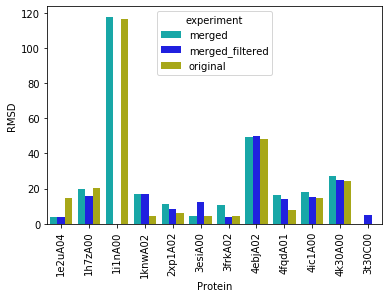

In [26]:
by_school = sns.barplot(x='fasta',y='rsmd',hue='experiment',data=g.reset_index())
for item in by_school.get_xticklabels():
    item.set_rotation(90)
by_school.set_xlabel('Protein')
by_school.set_ylabel('RMSD')